In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
import matplotlib.animation as animation
from scipy.integrate import solve_ivp
from IPython.display import HTML
from IPython.display import display, Markdown, Latex

# Duffing Oscillator Behavior
### Daniel Yaacov

The Duffing oscillator is a chaotic system defined by parameters $F$ and $\kappa$. A particle moves along one axis through a potential $$V(x) = \frac{x^4}{4} + \frac{x^2}{2}$$ with total energy $$E(t) = \frac{v(t)^2}{2} + V[x(t)]$$ The behavior of the particle through this potential is characterized by a a set of coupled ODE's: $$\frac{dx}{dt} = v$$ $$\frac{dv}{dt} = x - x^3 - \kappa v + F\cos{t}$$

To find the solution of these coupled differential equations, we have to turn them into a system using the vector $$\vec r = (x, v)$$ We can now define the differential system as
$$
\frac{d\vec r}{dt} =
\left(\begin{array}{cc} 
0 & 1\\
1 & -\kappa
\end{array}\right) \vec r + 
\left(\begin{array}{cc} 
0\\
-x^3 + F\cos(t)
\end{array}\right)
$$

In [2]:
def drdt(t, r, F, k):
    return np.array(([0, 1], [1, -k])) @ r + np.array([0, -np.power(r[0], 3) + F*np.cos(t)])

Using `scipy.integrate.solve_ivp()` we can return a solution for $\vec r(t)$ using the initial conditions $x(0)$ and $v(0)$

In [3]:
def solve_duffing(F, k, t_range = [0, 100*np.pi], r0 = np.array([0, 0]), dt = 0.01):
    sol = solve_ivp(drdt, t_range, r0, args = [F, k], dense_output = True, max_step = dt)
    return sol.t, sol.y

Now we want to visualize the energy of the particle with respect to time. The function `plot_energy()` would first graph the potential $V(x)$ then take the vector $\vec r$ and plot the particle's energy as a point $(x, E)$

In [4]:
def plot_energy(r, F, k, xmin = -1.7, xmax = 1.7):
    ax.clear()
    #plot graph of potential
    x = np.linspace(xmin, xmax, 100)
    plt.plot(x, x**4/4-x**2/2, 'b', label = r'$V(x)$')
    #plot energy of particle
    V = np.power(r[0], 4)/4 - np.power(r[0], 2)/2
    E = np.power(r[1], 2)/2 + V
    plt.plot(r[0], E, 'ro', markersize = 7, label = r'$F = {drive}$, $\kappa = {damp}$'.format(drive = F, damp = k))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$E$')
    plt.title('Duffing Oscillator Energy')
    plt.legend()
    plt.show()

We can also animate the evolution of the particle's position and energy over time using `matplotlib.animation.FuncAnimation()`

In [5]:
def plotanim(frame, r, F, k):
    plot_energy([r[0, frame], r[1, frame]], F, k)

In [ ]:
F = 0
k = 0
x = 1.5
v = 0
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(0, 0, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(1).mp4', writer = animation.FFMpegWriter(fps = 24))

For the first animation, we give trivial initial conditions $F = \kappa = 0$ and observe stable oscillatory motion. 

<center><video width="650" 
       src="duffing_energy(1).mp4"  
       controls>
</video></center>

In [ ]:
F = 0
k = 0.25
x = 1.5
v = 0
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(F, k, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(2).mp4', writer = animation.FFMpegWriter(fps = 24))

Now, we give $\kappa$, the damping constant, the value $\frac{1}{4}$. Again, the particle exhibits predictable motion, where it constantly loses energy until it comes to a stop.

<center><video width="650" 
       src="duffing_energy(2).mp4"  
       controls>
</video><center>

In [ ]:
F = 0.2
k = 0.25
x = 1.5
v = 0
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(F, k, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(3).mp4', writer = animation.FFMpegWriter(fps = 24))

We now introduce the driving force, $F$, giving it a value $0.2$. The particle still has a predictable path, but it doesn't settle at the bottom now.

<center><video width="650" 
       src="duffing_energy(3).mp4"  
       controls>
</video></center>

In [ ]:
F = 1
k = 0.25
x = 1.5
v = 0
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(F, k, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(4).mp4', writer = animation.FFMpegWriter(fps = 24))

Increasing $F$ to a much higher value like $1.0$ also gives a stable solution, but at a higher energy level. It also takes a little bit of time until it reaches a stable oscillation.

<center><video width="650" 
       src="duffing_energy(4).mp4"  
       controls>
</video></center>

In [ ]:
F = 1
k = 0.25
x = 0
v = 0
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(F, k, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(5).mp4', writer = animation.FFMpegWriter(fps = 24))

Changing the initial condition for $x$ alters the transient dynamics, but the particle still gravitates towards the same pattern of oscillation.

<center><video width="650" 
       src="duffing_energy(5).mp4"  
       controls>
</video></center>

In [ ]:
F = 0.4
k = 0.25
x = 0.2
v = 0
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(F, k, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(6).mp4', writer = animation.FFMpegWriter(fps = 24))

Finally, we give $F$ the value for the chaotic regime, $0.4$, and observe that the particle cannot reach a point in time where it achieves stability. Let's see how it behaves with differing initial conditions for $x$ and $v$

<center><video width="650" 
       src="duffing_energy(6).mp4"  
       controls>
</video></center>

In [ ]:
F = 0.4
k = 0.25
x = 0
v = 0.1
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(F, k, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(7).mp4', writer = animation.FFMpegWriter(fps = 24))

<center><video width="650" 
       src="duffing_energy(7).mp4"  
       controls>
</video></center>

In [ ]:
F = 0.4
k = 0.25
x = 1
v = 0.2
N = 20
fig, ax = plt.subplots()
t, r = solve_duffing(F, k, r0 = [x, v])
ani = animation.FuncAnimation(fig, plotanim, frames = np.arange(0, len(r[0]), N), fargs = [r, F, k], blit = True)
ani.save('duffing_energy(8).mp4', writer = animation.FFMpegWriter(fps = 24))

<center><video width="650" 
       src="duffing_energy(8).mp4"  
       controls>
</video></center>

### Poincaré Sections
A Poincaré section for a parametric equation records the points on the curve where $t$ is a multiple of some value, generally $2\pi$. 

We can do this by defining a function `poincare()`:

In [48]:
def poincare(start, t, r, F, k, step = 2*np.pi):
    ax.clear()
    for a in range(1, len(t)):
        if (t[a]+start)%step < (t[a-1]+start)%step or (t[a]+start)%step == 0:
            plt.plot(r[0][a], r[1][a], 'b.', markersize = 1)
    plt.suptitle(r'$F = {drive}$, $\kappa = {drag}$, step $= {inc}$'.format(drive = F, drag = k, inc = round(abs(step), 3)))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(r'$x(t)$')
    plt.ylabel(r'$v(t)$')
    plt.grid()

Figuring out a way to find a multiple of $2\pi$ seemed much easier than it actually was, due to the fact that `solve_ivp` doesn't evenly space its values of $t$, and that none of the $t$ values would be perfectly divisible by $2\pi$. This is because `np.pi` is accurate to 15 decimal places, and the $t$ values are only accurate to 2 decimal places.

<IPython.core.display.Javascript object>


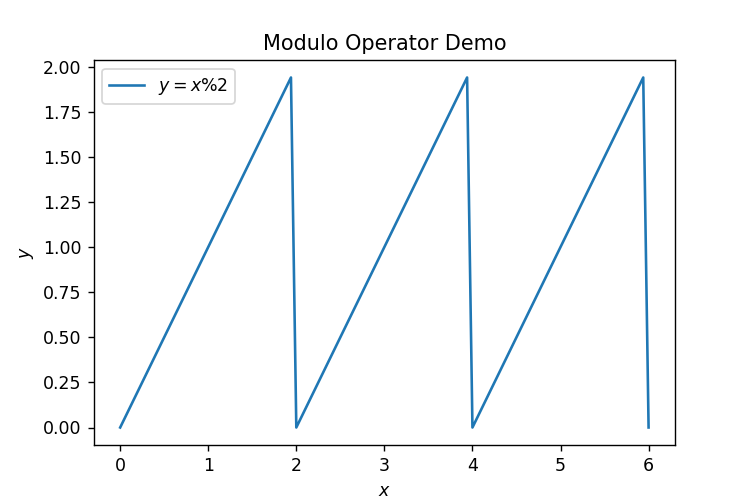

In [7]:
fig, ax = plt.subplots(figsize = (6,4))
x = np.linspace(0, 6, 100)
y = x%2
plt.plot(x, y, label = r'$y = x\%2$')
plt.title('Modulo Operator Demo')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()

My solution to this was to compare $t_{n-1}\%[2\pi]$ to $t_n\%[2\pi]$. $f(x) = x\%c$ is a cyclical function that ascends linearly to $c$ then jumps to zero and repeats. This means that if $t_{n-1}\%[2\pi]$ is greater than $t_n\%[2\pi]$, then there must have been a jump and $t_n$ would be the closest approximation to a multiple of $2\pi$.

Because the `poincare()` function will only plot a point every $2\pi$ units of time, we should set `t_range` to a much wider interval to see more points. Additionally, to only display past the transient motion, I've set a start value of $t_0 = 8\pi$. 

The following are Poincaré sections for values of $F$ 0.2 and 1.0, respectively:

<IPython.core.display.Javascript object>


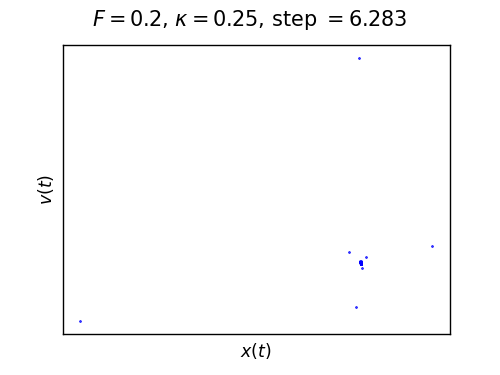

In [50]:
fig, ax = plt.subplots(figsize = (4,3))
F = .2
k = 1/4
step = 2*np.pi
start = 8*np.pi
t, r = solve_duffing(F, k, t_range = [0, 100*np.pi], r0 = [0,0])
poincare(start, t, r, F, k, step)
plt.show()

<IPython.core.display.Javascript object>


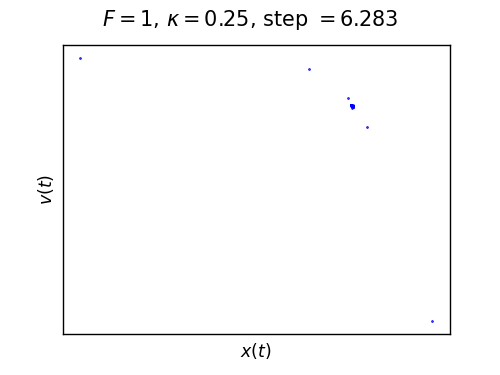

In [51]:
fig, ax = plt.subplots(figsize = (4,3))
F = 1
k = 1/4
step = 2*np.pi
start = 8*np.pi
t, r = solve_duffing(F, k, t_range = [0, 100*np.pi], r0 = [0,0])
poincare(start, t, r, F, k, step)
plt.show()

Now we observe the Poincaré section for the chaotic value, $F = 0.4$

<IPython.core.display.Javascript object>


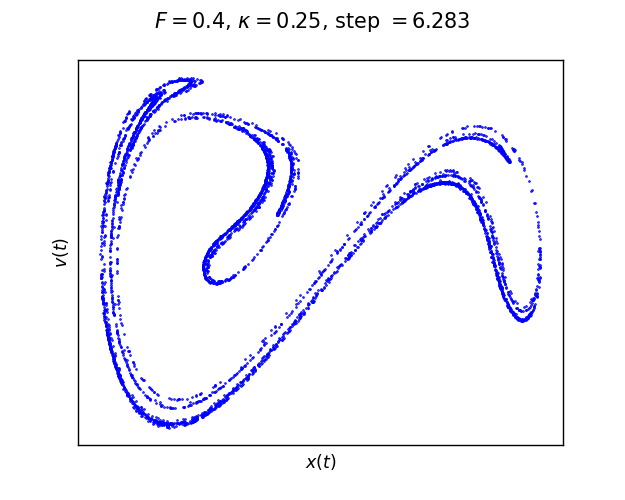

In [53]:
fig, ax = plt.subplots(figsize = (5, 4))
F = .4
k = 1/4
step = 2*np.pi
start = 8*np.pi
t, r = solve_duffing(F, k, t_range = [0, 10000*np.pi], r0 = [0,0])
poincare(start, t, r, F, k, step)
plt.show()

Even though watching the animation of $E(x)$ shows the unpredictability of the particle's path, strobing its velocity vs. position reveals structure.

We can alter the intial time for the strobing to shift the Poincaré section slightly until its been shifted back to its initial position. This can be shown with an animation. Let's first do this for $F = 0.2$

<IPython.core.display.Javascript object>


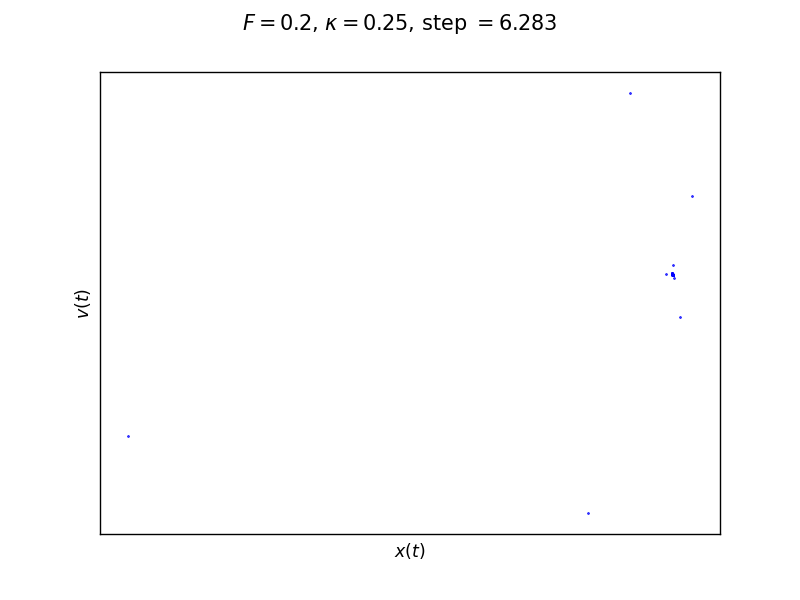

In [45]:
fig, ax = plt.subplots()
step = 2*np.pi
F = .2
k = 1/4
t, r = solve_duffing(F, k, t_range = [0, 100*np.pi])
ani = animation.FuncAnimation(fig, poincare, frames = np.linspace(8*np.pi, 8*np.pi + step, 120), fargs = [t, r, F, k, step], blit = True)
ani.save('duffing_poincare(1).mp4', writer = animation.FFMpegWriter(fps = 24))

<video width="600" 
       src="duffing_poincare(1).mp4"  
       controls loop>
</video><video width="600" 
       src="duffing_energy(3).mp4"  
       controls>
</video>

Now for $F = 1.0$

<IPython.core.display.Javascript object>


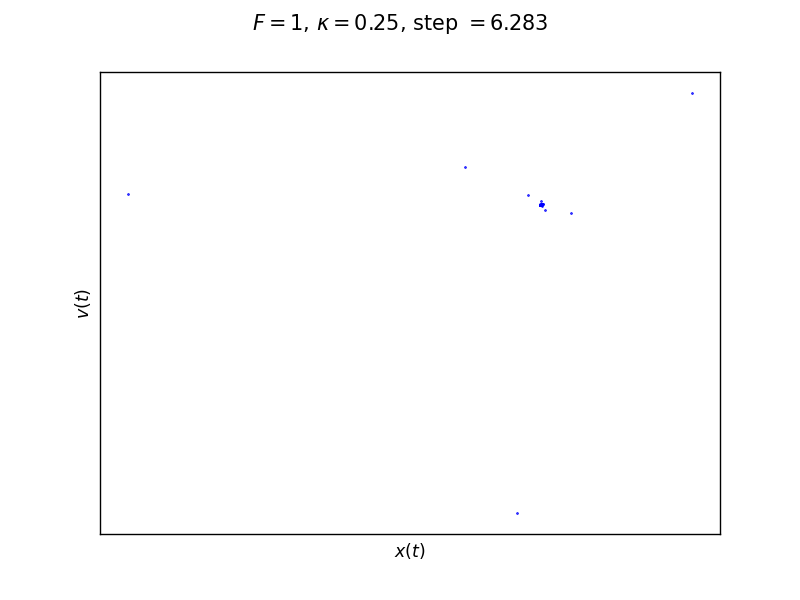

In [46]:
fig, ax = plt.subplots()
step = 2*np.pi
F = 1
k = 1/4
t, r = solve_duffing(F, k, t_range = [0, 100*np.pi])
ani = animation.FuncAnimation(fig, poincare, frames = np.linspace(8*np.pi, 8*np.pi + step, 120), fargs = [t, r, F, k, step], blit = True)
ani.save('duffing_poincare(2).mp4', writer = animation.FFMpegWriter(fps = 24))

<video width="600" 
       src="duffing_poincare(2).mp4"  
       controls loop>
</video><video width="600" 
       src="duffing_energy(5).mp4"  
       controls>
</video>

And finally, $F = 0.4$

<IPython.core.display.Javascript object>


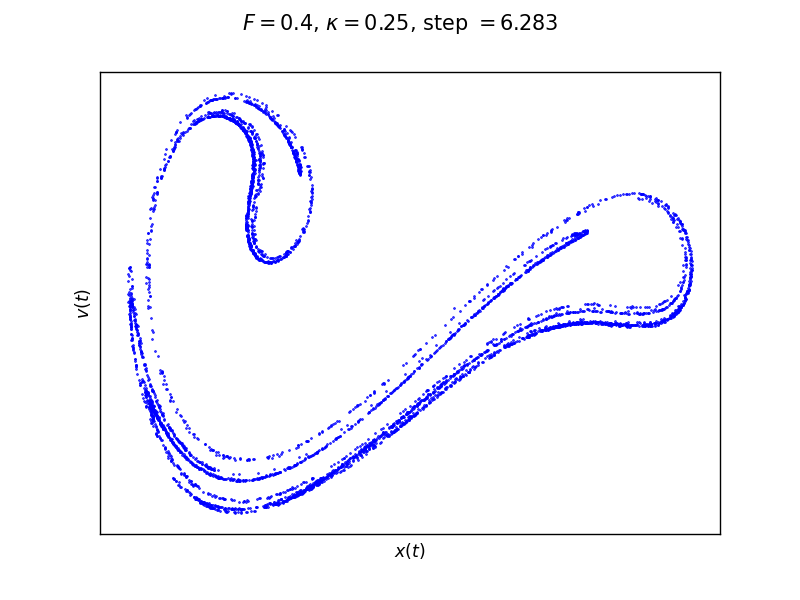

In [47]:
fig, ax = plt.subplots()
step = 2*np.pi
F = .4
k = 1/4
t, r = solve_duffing(F, k, t_range = [0, 10000*np.pi])
ani = animation.FuncAnimation(fig, poincare, frames = np.linspace(8*np.pi, 8*np.pi + step, 120), fargs = [t, r, F, k, step], blit = True)
ani.save('duffing_poincare(3).mp4', writer = animation.FFMpegWriter(fps = 24))

<video width="600" 
       src="duffing_poincare(3).mp4"  
       controls loop>
</video><video width="600" 
       src="duffing_energy(7).mp4"  
       controls>
</video>

Watching one point move in the Poincaré animation shows, in slow-motion, how a particle with those initial conditions would behave. This should demonstrate the chaotic behavior seen with $F = 0.4$

## Thanks for listening :)